## EDA : saturi DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import shutil

In [2]:
file_path = os.getenv('HOME') + '/aiffel/aiffelthon/'
# os.mkdir(file_path + '/spm')

In [3]:
os.listdir(file_path)

['MODELtf_ckpts_gd12_r1',
 'reg_2',
 'w2v_meaning_jj.model',
 'past_files',
 '.ipynb_checkpoints',
 '[라벨]제주도_학습용데이터_1.zip',
 'corpus_ko.txt',
 '[라벨]전라도_학습데이터_1.zip',
 'added',
 'final',
 '[라벨]경상도_학습데이터_1.zip',
 'reg_1',
 'reg_4',
 'spm',
 'datset_full_raw_needs_translation_0221_v2.csv',
 '[라벨]충청도_학습데이터_1.zip',
 'reg_5',
 'saturi_crawling_thesaurus_0223.csv',
 'final_dataset.zip',
 '[라벨]강원도_학습데이터_1.zip',
 'reg_3',
 'DATA',
 'corpus_en.txt']

In [4]:
os.listdir(file_path + 'final')

['Train_set_long_sequence_finalv1.csv',
 'raw_data_sampling(0223).csv',
 'Train_set_data.csv',
 'Test_set_data_sampling(0223).csv',
 'Train_set_long_sequence.csv']

In [5]:
df = pd.read_csv(file_path + '/final/Train_set_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065918 entries, 0 to 1065917
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1065918 non-null  object
 1   dial    1065918 non-null  object
 2   reg     1065918 non-null  object
 3   eng     1065918 non-null  object
dtypes: object(4)
memory usage: 32.5+ MB


In [7]:
df.head()

text  \
0                          생각이 쪼금씩 바뀌더라고   
1                어 알겠는가 외국인들이 그래도 잘 적응하고   
2               아으 갑자기 예전에 맹장 뜯은 게 생각난다.   
3  보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.   
4           약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도   

                                   dial reg  \
0                         생각이 쪼금씩 바뀌드라고  jd   
1               어 알겄는가 외국인들이 그래도 잘 적응하고  jd   
2             아으 갑자기 예전에 맹장 뜯은 게 생각난디야.  jd   
3  보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.  jd   
4           약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도  jd   

                                                 eng  
0                 I've changed my mind a little bit.  
1    You know what? Foreigners still get used to it.  
2  All of a sudden, I think I've ripped off my ap...  
3  I have a lot of ideas about getting older in a...  
4        It's a little bit of a tastey, but still...

In [8]:
df.reg.value_counts()

kw    375468
jj    259205
jd    191023
gs    121267
cc    118955
Name: reg, dtype: int64

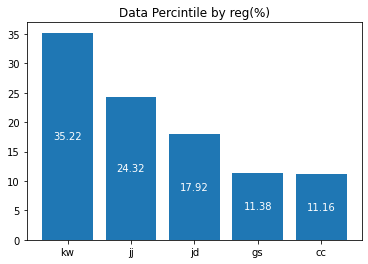

In [9]:
data = df.reg.value_counts(normalize=True).multiply(100).round(2)
fig, ax = plt.subplots()
p = ax.bar(data.index, data)
ax.bar_label(p, label_type='center', color='white')
plt.title("Data Percintile by reg(%)")
plt.show()

In [10]:
df_info = df.describe(include='object')

In [11]:
df_info #eng has weird translations

text           dial      reg  \
count   1065918        1065918  1065918   
unique  1058095        1065918        5   
top        그러니까  생각이 쪼금씩 바뀌드라고       kw   
freq         19              1   375468   

                                                      eng  
count                                             1065918  
unique                                             995422  
top     No, no, no, no, no, no, no, no, no, no, no, no...  
freq                                                  647

In [12]:
p = df_info.loc['unique',['text','dial','eng']].apply(lambda x : x - len(df)) # diff count from entire no. of rows
print(f'repeated count from entire row')
for col, val in zip(p.index, p) :
    print(f'{col} : {val}')

repeated count from entire row
text : -7823
dial : 0
eng : -70496


In [13]:
# find weird translations

In [14]:
def sen_len(corpus, kor=False) :
    max_len = 0
    min_len = 999
    cum_len = 0
    max_content = ''
    min_content = ''
    for i in corpus :
        if kor : 
            i = i[0]
        length = len(i)
        if length >= max_len : 
            max_len = length
            max_content = i
        if length <= min_len : 
            min_len = length
            min_content = i
        cum_len += length
    
    print(f'max_len : {max_len}')
    print('max_content :', max_content)
    print(f'min_len : {min_len}')
    print('min_content :', min_content)
    print(f'average_len : {round(cum_len/len(corpus),1)}')
    
    return max_len, min_len, cum_len

In [15]:
def plot_seq_dist(corpus,kor=False) :
    max_len, min_len , _ = sen_len(corpus,kor)
    seq_len_matrix = np.zeros((max_len+1), dtype=int)
    for i in corpus :
        if kor :
            i = i[0]
        length = len(i)
        seq_len_matrix[length] += 1
    
    fig,ax = plt.subplots()
    hist = ax.bar(range(len(seq_len_matrix)),seq_len_matrix)
    plt.title('seq_distribution')
    plt.show()

max_len : 2717
max_content : And to be honest, it's a little bit funny, and sometimes when you look at things like D-C-C-I-I-I don't know if they're kind of funny, so I'm not sure if they're doing something like roll or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something or something like that or something like that or something or something like that or something like that or something or something or something like that or something or something or something or something or something or something or something or something or something or something or something or something 

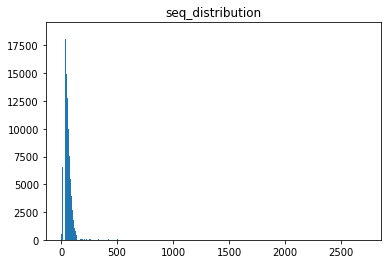

In [16]:
plot_seq_dist(df['eng'])

In [16]:
def plot_seq_dist_mod(corpus,kor=False) :
    max_len, min_len , _ = sen_len(corpus,kor)
    seq_len_matrix = np.zeros((max_len+1), dtype=int)
    for i in corpus :
        if kor :
            i = i[0]
        length = len(i)
        seq_len_matrix[length] += 1
    
    fig,ax = plt.subplots()
    hist = ax.bar(range(len(seq_len_matrix)),seq_len_matrix)
    plt.xlim([100,500])
    plt.title('seq_distribution')
    plt.show()

max_len : 2717
max_content : And to be honest, it's a little bit funny, and sometimes when you look at things like D-C-C-I-I-I don't know if they're kind of funny, so I'm not sure if they're doing something like roll or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something or something like that or something like that or something or something like that or something like that or something or something or something like that or something or something or something or something or something or something or something or something or something or something or something or something 

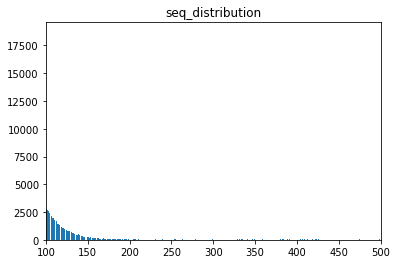

In [17]:
plot_seq_dist_mod(df['eng']) # len 150> 이상 되는 데이터를 확인해보겠습니다.

In [18]:
# find len of char in eng
df['eng_c_len'] = df['eng'].apply(lambda x : len(x))
df.head()

text  \
0                          생각이 쪼금씩 바뀌더라고   
1                어 알겠는가 외국인들이 그래도 잘 적응하고   
2               아으 갑자기 예전에 맹장 뜯은 게 생각난다.   
3  보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.   
4           약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도   

                                   dial reg  \
0                         생각이 쪼금씩 바뀌드라고  jd   
1               어 알겄는가 외국인들이 그래도 잘 적응하고  jd   
2             아으 갑자기 예전에 맹장 뜯은 게 생각난디야.  jd   
3  보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.  jd   
4           약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도  jd   

                                                 eng  eng_c_len  
0                 I've changed my mind a little bit.         34  
1    You know what? Foreigners still get used to it.         47  
2  All of a sudden, I think I've ripped off my ap...         60  
3  I have a lot of ideas about getting older in a...         66  
4        It's a little bit of a tastey, but still...         43

In [19]:
df['eng_c_len'].mean()

57.06015847372875

In [20]:
long_sen = df.loc[df['eng_c_len'] > 150,'eng'].head()
for i in long_sen :
    print(i, end='\n\n') # 반복되는 문구가 있는 데이터들이 존재하네요 이런 데이터들만 먼저 찾아 보겠습니다.

But then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose,

You're not playing, you're not playing, you're not dreaming, you're not playing, you're not playing, you're not playing, you're not playing, you're not playing.

It's a little bit different from what I

In [21]:
test ='Hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey'
test2 = "And to be honest, it's a little bit funny, and sometimes when you look at things like D-C-C-I-I-I don't know if they're kind of funny, so I'm not sure if they're doing something like roll or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something or something like that or something like that or something or something like that or something like that or something or something or something like that or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something like that or something or something or something or something or something or something like that or something or something like that or something like that or something or something or something or something or something or something or something or something like that or something like that or something like that or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something or something"

In [22]:
import re
re.search(r'(.+)\1{3,}',test)

<re.Match object; span=(1, 381), match='ey, hey, hey, hey, hey, hey, hey, hey, hey, hey, >

In [23]:
df[:3]

text                       dial reg  \
0             생각이 쪼금씩 바뀌더라고              생각이 쪼금씩 바뀌드라고  jd   
1   어 알겠는가 외국인들이 그래도 잘 적응하고    어 알겄는가 외국인들이 그래도 잘 적응하고  jd   
2  아으 갑자기 예전에 맹장 뜯은 게 생각난다.  아으 갑자기 예전에 맹장 뜯은 게 생각난디야.  jd   

                                                 eng  eng_c_len  
0                 I've changed my mind a little bit.         34  
1    You know what? Foreigners still get used to it.         47  
2  All of a sudden, I think I've ripped off my ap...         60

In [24]:
from time import perf_counter

start_time = perf_counter()
df['anom'] = df.eng.str.contains(r'(.+)\1{3,}', regex=True)
print(f'{perf_counter() - start_time:.3f}ms')
df.loc[df['anom'] == True, 'description'] = 'repeated words'

/tmp/ipykernel_31/2038003786.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['anom'] = df.eng.str.contains(r'(.+)\1{3,}', regex=True)


62.064ms


In [25]:
df[df['anom'] == True]

text  \
7                                  근데 쪘다가 또 빠졌다가 또 쪘다가 이렇게   
8                               놀이 있냐 이게 플레이냐 꿈이냐 틀리잖아 그니까   
39       희한한 맛이었어 뭘 긍까 뭐라할까 김 그 김 김밥나라나 이런 데에서 싸는 그런 맛이...   
57                      저~ 야 얌전히 누여가지고 좀 누가 이렇게 기름 바른 것 같이   
93       진짜 완전 이렇게 완전 허여멀건 해가지고 건더기 동동동 떠다닌 거를 나보고 먹어라는...   
...                                                    ...   
1065579                                  그럼 가만히해서 #이 그냥 #이   
1065645  누가 쏜거야 -초- 총을 쏠라고 했는데 그~ 오 만 불로 산 흑인 남자가 자기가 대...   
1065687                           삼만 구천 원 이면 거의 뷔페 값이다. #이   
1065690  왜냐하면 땅이 한 만평 조금 넘는데 거기에 한 거의 한 칠천평 이상이 짤려서 들어갈...   
1065711                           걔네한테만 벌레가 막 벌레들이 보글 보글해.   

                                                      dial reg  \
7                                   근데 쪘다가 또 빠졌다가 또 쪘다가 이케  jd   
8                                놀이 있냐 이게 플레이냐 꿈이냐 틀리잖아 긍게  jd   
39       희한한 맛이었어 뭘 긍까 뭐라할까 김 그 김 김밥나라나 이런 데에서 싸는 그런 맛이...  jd   
57                      저~ 야 얌전히 뉘여가지고 좀 누가 요로코 기름 바른 것 같이  jd   
93       진짜 완전 이렇게 완전 허여멀건 해가지고 건더기 동동동 떠다닌 거를 나보고 먹어라는...  jd   
...                                                    ...  ..   
1065579                                    그럼 가만히해서 이 그냥 이  jj   
1065645  누가 쏜겨 -초- 총을 쏠라고 했는데 그~ 오 만 불로 산 흑인 남자가 자기가 대신...  cc   
1065687                            삼만 구천 원 이면 거의 뷔페 값이다. 이  jj   
1065690  왜냐하면 땅이 한 만평 조금 넘는데 거기에 한 거의 한 칠천평 이상이 짤랑 들어갈꺼거든.  jj   
1065711                         걔네한테만 배랭이가 막 버랭이들이 보글 보글해.  jj   

                                                       eng  eng_c_len  anom  \
7        But then you lose, and then you lose, and then...        797  True   
8        You're not playing, you're not playing, you're...        160  True   
39       It's a little bit different from what I'm abou...        341  True   
57       Hey, hey, hey, hey, hey, hey, hey, hey, hey, h...        389  True   
93       It's really, really, really, really, really, r...       2032  True   
...                                                    ...        ...   ...   
1065579  Then stay still and just let it be let it be l...        367  True   
1065645  Who shot it I told him to shoot a gun but the ...        101  True   
1065687  Ifs its 30000 won or 1000 won its almost the p...         62  True   
1065690  Because the land is a little over 10000 pyeong...         98  True   
1065711  Only they have bugs that are very very very ve...        422  True   

            description  
7        repeated words  
8        repeated words  
39       repeated words  
57       repeated words  
93       repeated words  
...                 ...  
1065579  repeated words  
1065645  repeated words  
1065687  repeated words  
1065690  repeated words  
1065711  repeated words  

[17040 rows x 7 columns]

max_len : 2717
max_content : And to be honest, it's a little bit funny, and sometimes when you look at things like D-C-C-I-I-I don't know if they're kind of funny, so I'm not sure if they're doing something like roll or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something or something like that or something like that or something or something like that or something like that or something or something or something like that or something or something or something or something or something or something or something or something or something or something or something or something 

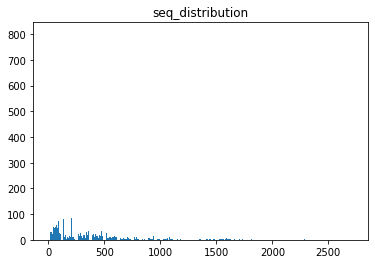

In [26]:
plot_seq_dist(df.loc[df['anom'] == True,'eng'])

In [27]:
df.loc[df['eng_c_len'] ==df['eng_c_len'].max()]

text  \
84687  조금 솔직히 조금 생긴 게 웃기게 생겨가지고 그거 가끔씩 디씨 같은 데 짤 같은 거...   

                                                    dial reg  \
84687  쫌 솔직히 쫌 생긴 게 웃기게 생겨가지고 그거 가끔씩 디씨 같은 데 짤 같은 거 보...  jd   

                                                     eng  eng_c_len  anom  \
84687  And to be honest, it's a little bit funny, and...       2717  True   

          description  
84687  repeated words

In [29]:
# save index with anomalies
anls = df[df['anom'] == True].index.tolist()

In [30]:
len(anls) # 이상이 있는 데이터는 다시 번역을 거쳐야할 것 같습니다.

17040

In [31]:
df.loc[anls,'eng'].values[0]

'But then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose,'

In [32]:
test_an = df[df['anom'] == True].text.values

In [34]:
from transformers import pipeline

In [33]:
print(test_an[0])

근데 쪘다가 또 빠졌다가 또 쪘다가 이렇게


In [34]:
model_ckpt = 'Helsinki-NLP/opus-mt-ko-en'
model_ckpt2 = 'circulus/kobart-trans-ko-en-v2'
model_ckpt3 = 'facebook/nllb-200-distilled-600M'

In [37]:
# pipe = pipeline('translation',model_ckpt)
# pipe(test_an[0])

[{'translation_text': 'But then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose,'}]

In [38]:
# pipe2 = pipeline('translation',model_ckpt2)
# pipe2(test_an[0])

[{'translation_text': 'But I gained more more more more'}]

In [35]:
from konlpy.tag import Mecab
mecab = Mecab()

In [36]:
stnd = df.text.values
dial = df.dial.values

max_len : 203
max_content : 잔치집에 따라가고 우리집은 왜 안해. 우리 딸도 빨리 잔치가 열려야지. 남편 복이 있어야지. 남편 복이 없으면 자식 복도 없다던데. 남편이 잘 해줘서 손도 안 움직인데. 너는 남편이 젊잖아. 우리 남편은 나이가 많아. 그래도 남편이 돈을 잘 벌잖아. 나는 착한 남편이 최고인 것 같아. 언제 한 번 놀러와. 저 사람 좀 보세요. 몽뚱이가 크더라. 다리 털이 많아.
min_len : 1
min_content : 네
average_len : 26.7


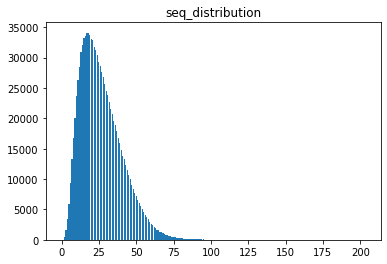

In [37]:
plot_seq_dist(stnd)

max_len : 203
max_content : 잔채집에 따라가고 우리집은 왜 안해. 우리 딸도 빨리 잔채가 열려야지. 사나 복이 있어야지. 사나 복이 없으면 자식 복도 없다던데. 사나이 잘 해줘서 손도 안 움직인데. 너는 사나이 젊잖아. 우리 사나은 나이가 많아. 그래도 사나이 돈을 잘 벌잖아. 나는 착한 사나이 최고인 것 같아. 운제 한 번 놀러와. 저 사람 좀 보와. 몸띠이가 크더라. 다리 터리기 많아.
min_len : 1
min_content : 매
average_len : 26.3


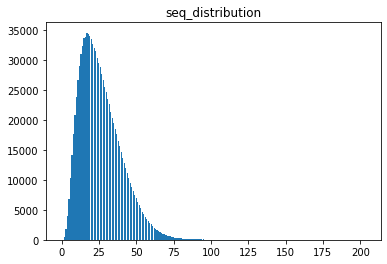

In [38]:
plot_seq_dist(dial)

In [39]:
df['ko_len']  = df['text'].apply(lambda x : len(x.split()))

In [40]:
df['ko_len'].mean()

7.606978210331376

In [41]:
df.groupby('reg')[['ko_len']].agg(['mean','std','max','min'])

ko_len                  
          mean       std max min
reg                             
cc   10.569367  4.189085  43   1
gs    9.856927  4.366507  56   1
jd    8.983170  4.129336  34   1
jj    6.486896  3.517614  53   1
kw    6.014861  3.039842  56   1

In [42]:
cc = df.loc[(df['reg'] == 'cc')].sort_values(by=['ko_len','text']).head()
cc = pd.concat([cc,df.loc[(df['reg'] == 'cc')].sort_values(by=['ko_len','text']).tail()],axis=0)

In [ ]:
#mecab
df['token'] = df['text'].apply(mecab.morphs)
df['token_len'] = df['token'].apply(len)
df['token_dial'] = df['dial'].apply(mecab.morphs)
df['token_dial_len'] = df['token_dial'].apply(len)

In [44]:
df['token_len_diff'] = df['token_len'] - df['token_dial_len']

<AxesSubplot:>

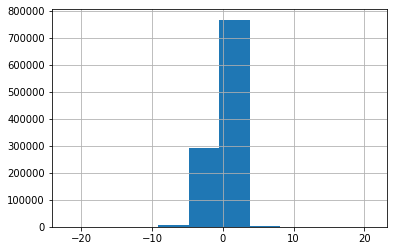

In [45]:
plt.rcParams['font.family'] = 'sans-serif'
df['token_len_diff'].hist()

In [46]:
print("표준어 문맥 길이:",df['token_len'].mean())
print("사투리 문맥 길이:",df['token_dial_len'].mean())

표준어 문맥 길이: 13.450415510386353
사투리 문맥 길이: 13.702022106766186


In [47]:
df.groupby(by=['reg'])[['token_len','token_dial_len','token_len_diff']].agg(['mean','max','min'])

token_len          token_dial_len          token_len_diff        
          mean  max min           mean  max min           mean max min
reg                                                                   
cc   17.993552   73   1      18.058022   74   1      -0.064470   6 -11
gs   16.719924   90   1      16.763514   90   1      -0.043590  10 -14
jd   15.456134   61   1      15.540500   61   1      -0.084367   7 -12
jj   11.454301   97   1      11.636600   95   1      -0.182300  21 -22
kw   11.312690  109   1      11.823700  104   1      -0.511010   7 -12

In [48]:
df.loc[df['token_len_diff'] < 0].sample(20)

text  \
678605                           자격증 하니까 옛날에 우리 학교에서 일할 때   
768580                     근데 네이버 라고 해서 사투리 다 나와있는 건 아니네?   
467417                               외아들을 너무 귀하게 키운 거 같다.   
356375                             이럭저럭하는 사이에 벌써 한 달 지났어.   
981902                    야 완전 이제 -수- 뚝 뚝 뚝 뚝 금방 떨어지는 거지.   
696205  저에게 이 일을 의뢰하실 땐 어떻게든 @이름1씨 마음에 상처를 주면 된다고 하신 거...   
667231                           과일드세요 할머니 약간 과식하신 거 같은데.   
880870                 가끔 절일 때도 있는데 나박김치는 아니어도 열무김치나 아니면은   
841103                                         굼벵이 달여서 #이   
665658                                   가마솥 뚜껑에 김치 구워먹자.   
485517                                       지금 반항하는 겁니까?   
748912                     그러니까 또 @이름풀어줄까 이러면 말귀 다 알아 들어.   
782422                     우리 색시 콧바람 쐐 주러 밤 산책 갔다 오는 길이야.   
632842                                 엄마가 감나무 심어보자고 하시네.   
286021                    또 습기는 어떻게 제거하는 건지 방습제는 뭘 쓰는 건지.   
450859                                자 우리 오늘도 힘차게 살아봅시다.   
390173                                그래 진짜 옥은 더 밝은 색깔이야.   
468427            이왕 들킨 거 천천히 먹어라 체할라 그런 게 길에서 먹구 싶니 여자가?   
445369                   벌집 털 때 여왕벌만 잡으면 나머지 일벌들은 게임 오버다.   
13318                                  우리가 같이 한 번 공부 해보자.   

                                                     dial reg  \
678605                           자격증 하니까 엣날에 우리 학교에서 일할 때  jd   
768580                     근데 네이버 랜 해그넹 사투리 다 나와있는 건 아니네?  jj   
467417                               에아덜을 너무 귀하게 키운 거 같다.  kw   
356375                             이럭저럭하는 사이에 발쌔 한 달 지났어.  kw   
981902                    야 완잠 이제 -수- 뚝 뚝 뚝 뚝 금방 떨어지는 거지.  jj   
696205  저에게 이 일을 의뢰하실 땐 어떻게든 @이름1씨 마옴에 상체를 주면 된다고 하신 거...  kw   
667231                           과일드세요 할멍이 약간 과식하신 거 같은데.  kw   
880870                 가끔 절굴 때도 있는데 나박김치는 아니어도 열무김치나 아니면은  cc   
841103                                        굼벵이 딸령 먹어나고  jj   
665658                                   가매솥 뚜껑에 김치 구워먹자.  kw   
485517                                       지굼 반항하는 겁니까?  kw   
748912                     그런께네 또 @이름풀어줄까 이라면 말귀 다 알아 들어.  gs   
782422                     우리 샥시 콧바람 쐐 주러 밤 산책 갔다 오는 길이야.  kw   
632842                                 엄마가 감낭그 심어보자고 하시네.  kw   
286021                     또 습기는 어떵 제거하는 건지 방습제는 뭘 쓰는 건지.  jj   
450859                                자 우리 오놀도 힘차게 살아봅시다.  kw   
390173                               거래 진뗑이 옥은 더 밝은 색깔이야.  kw   
468427            이왕 들킨 거 시느매 먹어라 체할라 그른 게 길에서 먹구 싶니 예나가?  kw   
445369                 개자빼기 털 때 여왕벌만 잡으면 나무지 일벌들은 게임 오버다.  kw   
13318                                 우리가 같이 한 번 공부 해보게잉.  jd   

                                                      eng  eng_c_len   anom  \
678605  Because I got a certificate when I was working...         59  False   
768580   But Naver doesnt mean all the dialects are on it         48  False   
467417       I think he raised his only son too precious.         44  False   
356375                                 It's been a month.         18  False   
981902  Hey its completely number its falling quickly ...         51  False   
696205  Didnt you say that you could hurt the heart of...         90  False   
667231      I think you've been eating a little too much.         45  False   
880870  Sometimes its pickled but even if its not naba...         77  False   
841103                                Hey lets sweeten it         19  False   
665658                     Let's roast it on the pot lid.         30  False   
485517                                 Are you rebelling?         18  False   
748912  So if you want me to solve your name I can und...         64  False   
782422  Week is the way to go for a night walk to give...         62  False   
632842            My mom wants me to plant a perforation.         39  False   
286021  And how we get rid of the moisture, what the a...         65  False   
450859              So let's try to live our lives today.         37  False   
390173           Yeah, the real jade is a brighter color.     

In [49]:
df.loc[df['token_len_diff'] > 0].sample(20)

text  \
911845    막 프로 맨 처음에는 제가 처음에 아는 거는 유산균이었어요 유산균이 프로바이오틱스래요.   
196771                    진짜? 우리 그때 언니 언니 네랑 갔을 때 완전 맛있었어.   
482390                                   아이도 이제 선생님 하고 맞으니   
970224                                         찾고싶어? 좀 찾아봐   
180250   특히 노형 같은 경우는 퀵기사들이 진짜 많은거 알지? 맞아 오토바이들 진짜 위험하게...   
72670                   그 남자애도 이상해 결혼식 때 갔는데 친구가 없어 남자친구가.   
881554                                    우리 친척 할아버지 집이었어.   
547175                                      담가놓은 것을 짐장해야지.   
370531                            제가 감정을 건드린 것은 아닌지 모르겠어요.   
776701            야 국 끓여 먹고 하는데 왜 그것만  김장할 때도 많이 넣을 거 아니야?   
157942                                          너 해킹 먹은 거야   
150853                           청소 안해서 압수 당하고 막 이런 식으로 #이   
180881                            게메 /그러게 날씨가요 화창했으면 좋았을텐데   
294881       그래도 옛날에 김치 담가 먹을 때는 여기 가서도 배우고 저희 가서도 배우고 했는데   
300109                   진짜 #이 그런 경험이 어떻게 보면 진짜 좋은 거 같기도 해   
1047772                              넌 너무 지르는 노래만 좋아하지 않냐?   
1009670                                            시동을 거는데   
247469                                     나 한 적 없어. 다행이지.   
222286   거기는 비닐 절대 들어가지 말라고 하더라 여기 아줌마 아니 그 할머니 그 비닐은 빼...   
220321                                            새벽에 만났어.   

                                                      dial reg  \
911845     막 프로 맨 처음엔 제가 처음에 아는 거는 유산균이었어요 유산균이 프로바이오틱스래요.  jd   
196771                     진짜? 우리 그때 언니 언니 네랑 갔을 때 완전 맛있언.  jj   
482390                                    아도 이제 선생님 하고 맞으니  kw   
970224                                          찾고심? 좀 찾아봐  jj   
180250   특히 노형 같은 경우는 퀵기사들이 진짜 많은거 알지? 맞아 오토바이들 진짜 위험하게...  jj   
72670                   그 머시매도 이상해 결혼식 때 갔는데 친구가 없어 남자친구가.  jd   
881554                                     우리 친척 할아버지 집이연.  jj   
547175                                       당과논 거르 짐장해야지.  kw   
370531                             지가 감정을 건드린 근 아닌지 모르겠어요.  kw   
776701             야 국 끓여 먹고 하는데 왜 그것만  김장할 때도 많이 늘 거 아니야?  cc   
157942                                           너 해킹 먹은 거  jj   
150853                            청소 안해서 압수 당하고 막 이런 식으로 이  jj   
180881                               게메  날씨가예 화창해시믄이 좋아실건디  jj   
294881          게도 옛날에 김치 담가 먹을 때는 여기 강도 배우고 저희 강도 배우고 해신디  jj   
300109                    진짜 이 그런 경험이 어떻게 보면 진짜 좋은 거 같기도 해  jj   
1047772                             닌 너무 지르는 노래만 좋아한다 아이가?  gs   
1009670                                             시동을 건디  jd   
247469                                      나 한 적 엄. 다행이지.  jj   
222286   거기는 비닐 절대 들어가지 말랜 하더라 여기 아줌마 아니 그 할머니 그 비닐랑 뺑 놉서.  jj   
220321                                             새벽에 만난.  jj   

                                                       eng  eng_c_len   anom  \
911845   At first I knew about lactobacillus because it...         62  False   
196771    We were so good back then when we went with you.         48  False   
482390                            He's right with you now.         24  False   
970224                 Do you want to find it or something         35  False   
180250   Yeah, motorcycles go in real dangerous places,...        120  False   
72670    He went to the wedding, but he didn't have any...         55  False   
881554              It was my relatives grandfathers house         38  False   
547175                               We'll pack the fence.         21  False   
370531            I don't know if I touched your emotions.         40  False   
776701   Hey why arent you going to put a lot of soup i...         75  False   
157942                                         You hacked.         11  False   
150853              Uncleaned, confiscated, just like this         38  False   
180881            - It's the weather. I wish it was sunny.         40  False   
294881   But in the old days, when we used to eat Kimch...        109  False   
300109      I think it's a really good experience to have.         46  False   
1047772             Dont you like songs that sing too much         38  False   
1009

In [50]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.font_manager as fm

In [51]:
from collections import Counter

In [52]:
counter = Counter()
for i in df.token :
    counter.update(i)
counter.most_common(30)

[('.', 411230),
 ('는', 370701),
 ('이', 369464),
 ('고', 334634),
 ('하', 302637),
 ('가', 298041),
 ('어', 213790),
 ('에', 198882),
 ('도', 190233),
 ('거', 184949),
 ('을', 175323),
 ('있', 165913),
 ('?', 155642),
 ('은', 148531),
 ('나', 134670),
 ('그', 133023),
 ('조금', 131076),
 ('지', 125071),
 ('다', 123625),
 ('게', 122359),
 ('~', 118968),
 ('아', 116659),
 ('들', 113441),
 ('뭐', 101580),
 ('를', 100259),
 ('는데', 96820),
 ('야', 93455),
 ('안', 87676),
 ('한', 86743),
 ('면', 84049)]

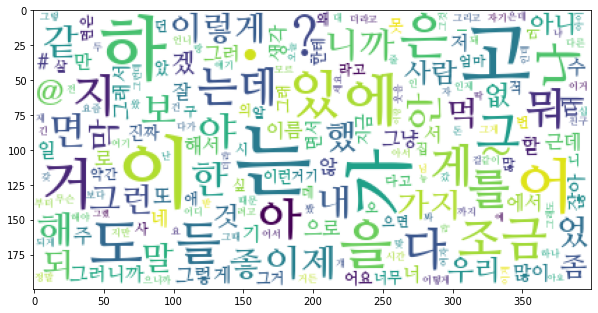

In [53]:
# font path http://corazzon.github.io/matplotlib_font_setting
font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
font_list[0][1]
wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=60)
cloud = wc.generate_from_frequencies(counter)
fig = plt.figure(figsize =(10,10))
plt.imshow(cloud)
plt.show()

In [54]:
regs = ['kw','jj','cc','gs','jd']

kw
[('.', 239838), ('이', 116324), ('가', 91479), ('는', 91092), ('?', 87882), ('하', 79027), ('고', 68445), ('어', 62999), ('에', 58278), ('을', 53362), ('있', 48116), ('은', 47024), ('다', 44444), ('거', 43350), ('지', 40894), ('도', 40499), ('나', 34345), ('야', 32546), ('게', 29893), ('@', 29070), ('를', 28080), ('그', 26937), ('아', 26850), ('이름', 26616), ('들', 26466), ('한', 24747), ('안', 24316), ('해', 24212), ('내', 23168), ('면', 20707)]

jj
[('이', 80308), ('어', 69106), ('하', 66285), ('는', 65324), ('.', 59262), ('고', 58637), ('가', 54743), ('거', 45133), ('도', 44241), ('에', 41344), ('#', 41214), ('?', 37175), ('아', 36025), ('있', 33112), ('나', 33016), ('그', 31545), ('지', 28157), ('게', 27258), ('다', 26026), ('은', 25899), ('면', 23357), ('야', 23352), ('안', 23107), ('는데', 22086), ('을', 21855), ('들', 21653), ('막', 21119), ('한', 18375), ('했', 17673), ('니까', 17470)]

cc
[('는', 68459), ('고', 56706), ('이', 53908), ('하', 46333), ('가', 46297), ('.', 34401), ('을', 32816), ('거', 31534), ('도', 30750), ('~', 30597), (

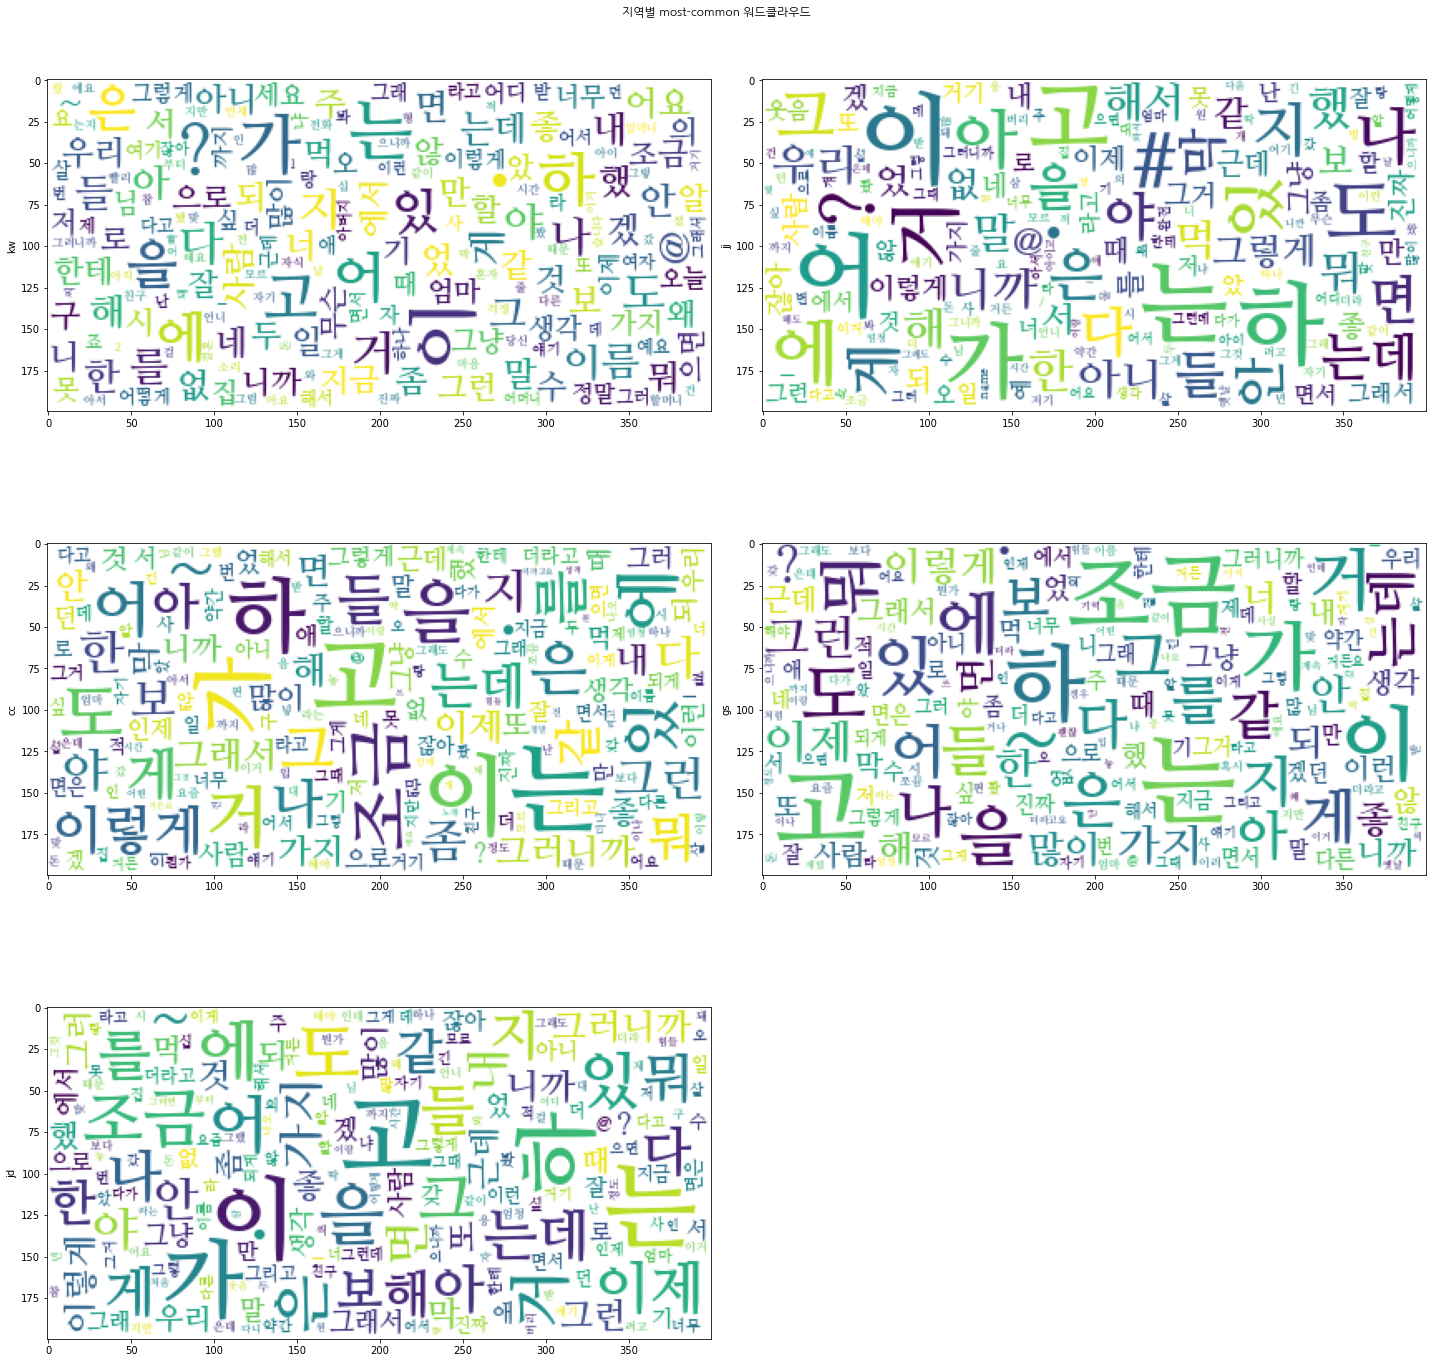

In [55]:
plt.figure(figsize= (20,20))

for i, reg in enumerate(regs) :
    counter = Counter()
    for k in df.loc[df['reg'] == reg].token :
        counter.update(k)
    
    print(reg)
    print(counter.most_common(30),end='\n\n')

    # font path http://corazzon.github.io/matplotlib_font_setting
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1]
    wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=60)
    
    
    cloud = wc.generate_from_frequencies(counter)
    
    plt.subplot(3,2,i+1)
    plt.ylabel(reg)
    plt.imshow(cloud)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.suptitle('지역별 most-common 워드클라우드',  font ='NanumGothic')
plt.tight_layout()
plt.show()

In [56]:
import nltk
# nltk.download('punkt') # just for example
from nltk import ngrams
# from nltk.tokenize import word_tokenize # just for example
import seaborn as sns

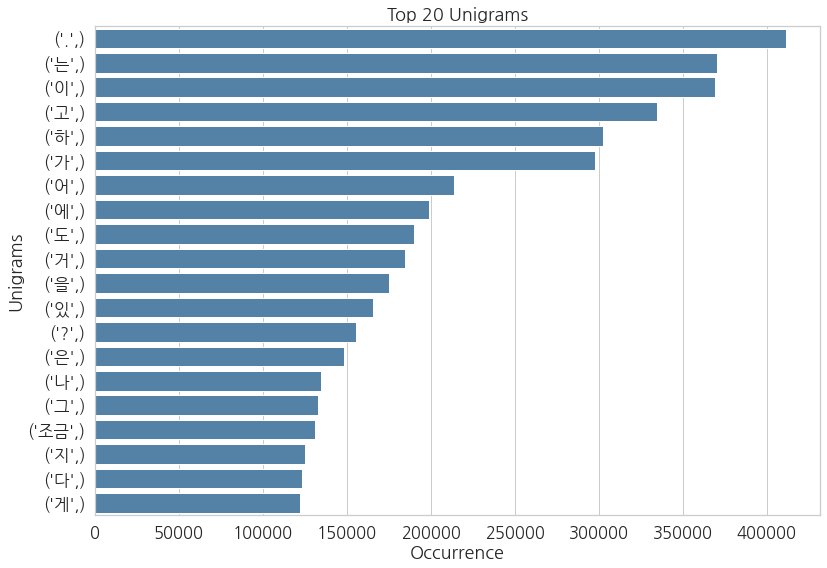

In [59]:
frequency_pos = Counter()
for i in df['token'] :
    token_words = ngrams(i,1) #change n-grams
    frequency_pos.update(token_words)
    
df_pos = pd.DataFrame(frequency_pos.most_common(20))

plt.rcParams['figure.figsize'] = [13,9]

# Barplot that shows the top most common
sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')

sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

# Setting axes labels
sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Unigrams', title = 'Top 20 Unigrams');

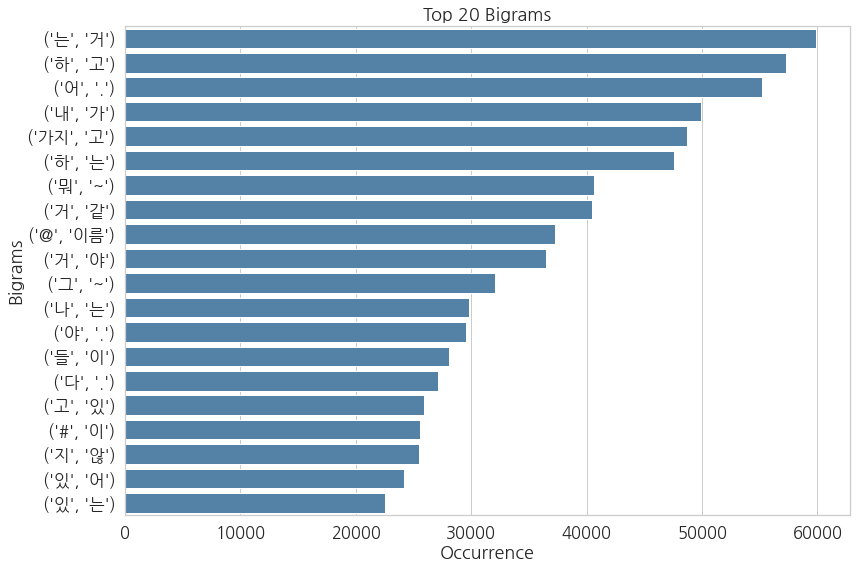

In [60]:
frequency_pos = Counter()
for i in df['token'] :
    token_words = ngrams(i,2)
    frequency_pos.update(token_words)
    
df_pos = pd.DataFrame(frequency_pos.most_common(20))

# Barplot that shows the top most common
sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')

sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

# Setting axes labels
sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Bigrams', title = 'Top 20 Bigrams');

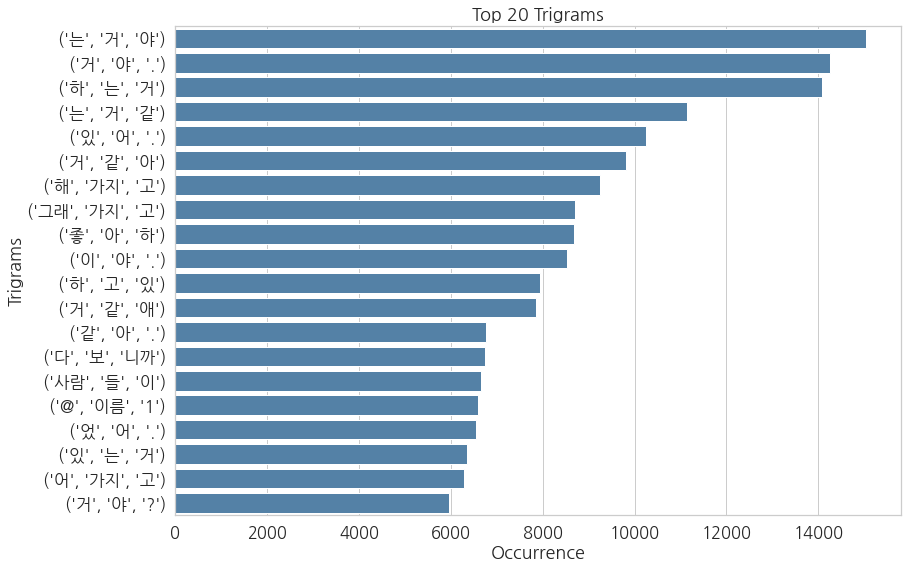

In [61]:
frequency_pos = Counter()
for i in df['token'] :
    token_words = ngrams(i,3)
    frequency_pos.update(token_words)
    
df_pos = pd.DataFrame(frequency_pos.most_common(20))

# Barplot that shows the top most common
sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')

sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

# Setting axes labels
sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Trigrams', title = 'Top 20 Trigrams');

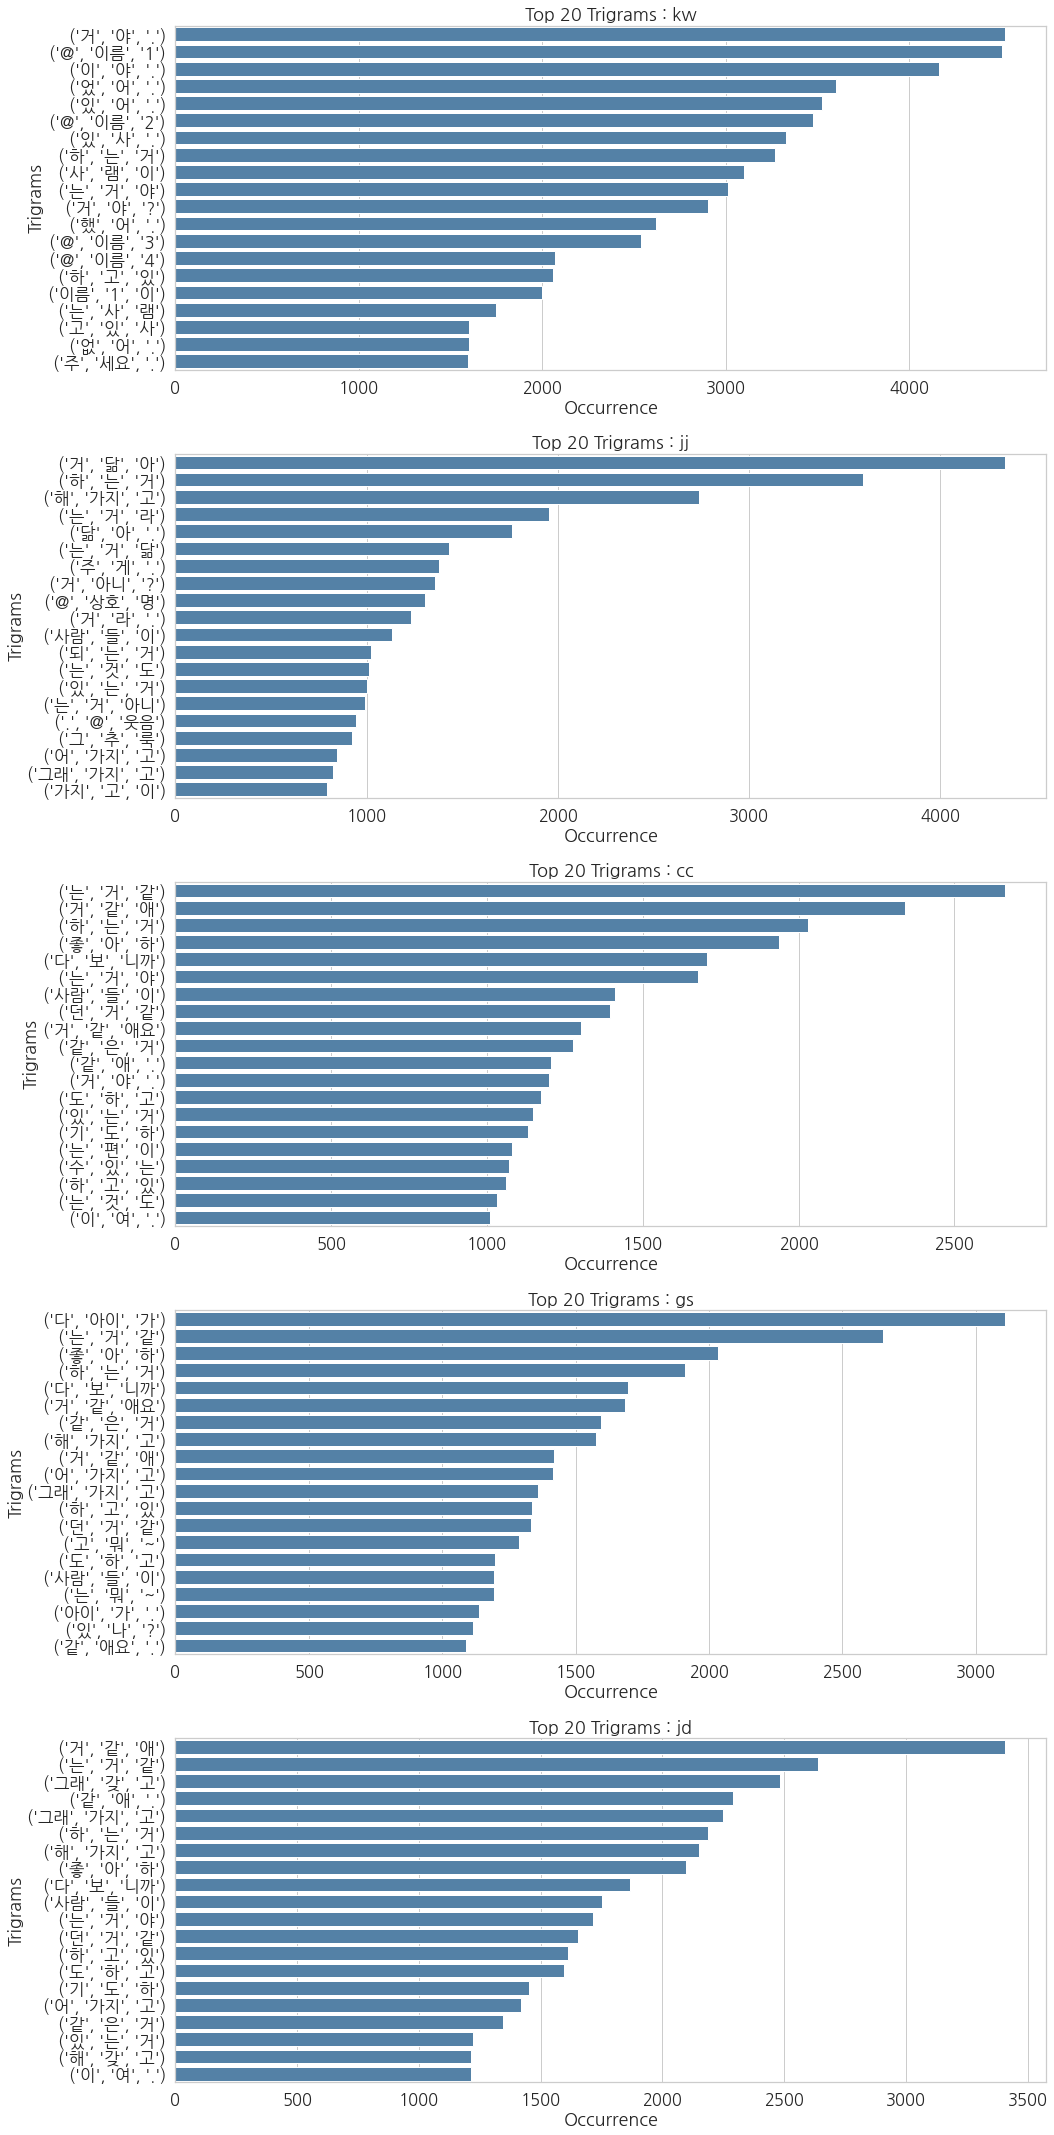

In [62]:
fig = plt.figure(figsize=(15,30))

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    
    for k in df.loc[df['reg'] == reg, 'token_dial'] :
        token_words = ngrams(k,3)
        frequency_pos.update(token_words)

    df_pos = pd.DataFrame(frequency_pos.most_common(20))

    # Barplot that shows the top most common
    
    plt.subplot(5,1,i+1)
    sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')
    sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

    # Setting axes labels
    sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Trigrams', title = f'Top 20 Trigrams : {reg}')
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

    
plt.tight_layout()
plt.show()

In [63]:
#명사 카운트
reg_dic = dict()
for reg in regs :
    noun_counter = Counter()
    eomi_counter = Counter()
    sentences_tag = []

    for i in df.loc[df['reg'] == reg ,'text'].sample(frac=1)[:100000] :
        sentences_tag.extend(mecab.pos(i))

    for word, tag in sentences_tag:
        if tag in ['NNG']: 
            noun_counter.update([word])

        if tag in ['EC'] :
            eomi_counter.update([word])
            
    reg_dic[reg] = {'noun_count' : noun_counter, 'eomi_count' : eomi_counter}

In [64]:
for reg in regs :
    print(reg)
    print('noun')
    print(reg_dic[reg]['noun_count'].most_common(20))
    print('eomi')
    print(reg_dic[reg]['eomi_count'].most_common(20))
    print()

kw
noun
[('이름', 6932), ('사람', 4714), ('말', 3702), ('일', 3200), ('엄마', 2388), ('집', 2267), ('생각', 2235), ('때', 2152), ('여자', 1517), ('얘기', 1340), ('애', 1328), ('아버지', 1294), ('어머니', 1294), ('전화', 1287), ('결혼', 1270), ('돈', 1164), ('마음', 1114), ('언니', 1046), ('오빠', 1013), ('소리', 961)]
eomi
[('고', 17828), ('지', 5551), ('면', 5239), ('게', 5064), ('어', 4889), ('는데', 3819), ('아', 2994), ('니까', 2585), ('구', 2559), ('으면', 2241), ('다', 2075), ('서', 1795), ('면서', 1407), ('다고', 1339), ('어서', 1092), ('라고', 1042), ('지만', 1003), ('니', 936), ('나', 911), ('으니까', 844)]

jj
noun
[('말', 4808), ('때', 4231), ('사람', 4126), ('막', 3748), ('웃음', 2582), ('집', 2377), ('생각', 2102), ('이름', 1996), ('그때', 1801), ('아이', 1597), ('엄마', 1548), ('돈', 1475), ('언니', 1316), ('예', 1226), ('일', 1208), ('옛날', 1180), ('얘기', 1178), ('애', 1033), ('시간', 920), ('친구', 913)]
eomi
[('고', 21960), ('어', 13483), ('면', 8747), ('는데', 8186), ('게', 6844), ('지', 6504), ('니까', 6337), ('아', 6070), ('면서', 3530), ('서', 3530), ('다', 3525), ('다고', 2

In [103]:
import sentencepiece as spm
def generate_tokenizer(corpus, vocab_size, lang="en", pad_id=0, bos_id=1, eos_id=2, unk_id=3):

    temp_file = os.getenv('HOME') + f'/aiffel/aiffelthon/spm/corpus_{lang}.txt'     # corpus를 받아 txt파일로 저장
    
    with open(temp_file, 'w') as f:
        for row in corpus:
            f.write(str(row) + '\n')
    
    # Sentencepiece를 이용해 
    spm.SentencePieceTrainer.Train(
        f'--input={temp_file} --model_type=bpe --pad_id={pad_id} --bos_id={bos_id} --eos_id={eos_id} \
        --unk_id={unk_id} --model_prefix=spm_{lang}_r1 --vocab_size={vocab_size} \
        --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw>,@이름,@상호 --remove_extra_whitespaces=false'   # model_r1
    )
    
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(f'spm_{lang}_r1.model') # model_r1

    return tokenizer

In [76]:
spm_corpus = df.loc[df['reg'] == regs[0]].sample(frac=1).copy()[:100000]

for reg in regs[1:] :
    temp_corpus = df.loc[df['reg'] == reg].copy()[:100000]
    spm_corpus = pd.concat([spm_corpus,temp_corpus],axis=0)
len(spm_corpus)

500000

In [77]:
train_corpus = spm_corpus['dial'].values
train_corpus[:5]

array(['다른 사램도 아니고 @이름2가 바람을 펴?', '왜사그래?',
       '시집간 딸한테 하는 거 반만이라도 저사램한테 해보세요.', '오날 선생님이 증말 심하게 나를 야단치셨데.',
       '야 아이씨.'], dtype=object)

In [104]:
tokenizer = generate_tokenizer(train_corpus, 8011, 'dial')
# tokenizer = spm.SentencePieceProcessor()
# tokenizer.Load('spmdial_r1.model')

In [105]:
df['text'][:10].apply(tokenizer.encode_as_pieces)

0                               [▁생각이, ▁쪼금씩, ▁바뀌, 더라고]
1         [▁어, ▁알, 겠, 는가, ▁외국, 인들이, ▁그래도, ▁잘, ▁적응, 하고]
2    [▁아, 으, ▁갑자기, ▁예전에, ▁맹, 장, ▁뜯, 은, ▁게, ▁생각, 난다, .]
3    [▁보면은, ▁조금, ▁품, 위, ▁있게, ▁나이, ▁들어가, 야, ▁되겠, 단, ...
4      [▁약간, ▁조금, ▁약간, ▁맛이, ▁쪼끔, ▁거시기, ▁하긴, ▁한데, ▁그래도]
5    [▁다른, ▁데, ▁뭐, ~, ▁수영, ▁카페, ▁같은, ▁데, ▁가, ▁보면은, ...
6    [▁그거를, ▁이렇게, ▁깨, 달, 으면서, ▁제가, ▁좋아하는, ▁맛집, 이, ▁...
7         [▁근데, ▁쪘, 다가, ▁또, ▁빠졌, 다가, ▁또, ▁쪘, 다가, ▁이렇게]
8    [▁놀, 이, ▁있냐, ▁이게, ▁플, 레이, 냐, ▁꿈이, 냐, ▁틀리, 잖아, ...
9            [▁모든, ▁종류, 의, ▁기록, 을, ▁, 깼, 다고, ▁하더라고, .]
Name: text, dtype: object

In [106]:
#sentencepiece
# df = pd.read_csv(file_path + '/final/Train_set_data.csv')
df['spm_token'] = df['text'].apply(tokenizer.encode_as_pieces)
df['spm_token_len'] = df['spm_token'].apply(len)
df['spm_token_dial'] = df['dial'].apply(tokenizer.encode_as_pieces)
df['spm_token_dial_len'] = df['spm_token_dial'].apply(len)

In [81]:
df.groupby('reg')[['ko_len']].agg(['mean','std','max','min'])

ko_len                  
          mean       std max min
reg                             
cc   10.569367  4.189085  43   1
gs    9.856927  4.366507  56   1
jd    8.983170  4.129336  34   1
jj    6.486896  3.517614  53   1
kw    6.014861  3.039842  56   1

In [107]:
df.groupby('reg')[['spm_token_len']].agg(['mean','std','max','min'])

spm_token_len                   
             mean       std  max min
reg                                 
cc      15.243899  6.025095   62   1
gs      14.103829  6.247729   83   1
jd      13.165797  6.026679   50   1
jj      10.324492  5.408763  100   1
kw      10.588130  4.925962   93   1

<AxesSubplot:>

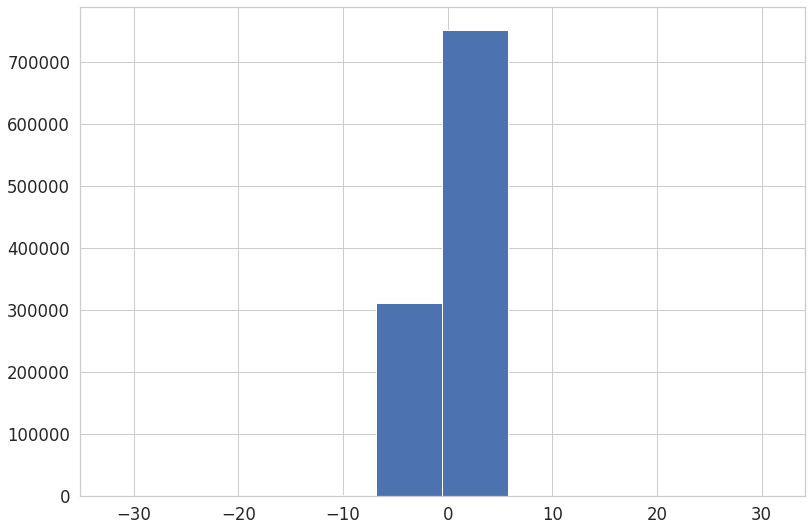

In [108]:
df['spm_token_len_diff'] = df['spm_token_len'] - df['spm_token_dial_len']
plt.rcParams['font.family'] = 'sans-serif'
df['spm_token_len_diff'].hist()

In [109]:
print("표준어 문맥 길이:",df['spm_token_len'].mean())
print("사투리 문맥 길이:",df['spm_token_dial_len'].mean())

표준어 문맥 길이: 11.905513369696356
사투리 문맥 길이: 12.24583035468019


In [110]:
df.groupby(by=['reg'])[['spm_token_len','spm_token_dial_len','spm_token_len_diff']].agg(['mean','max','min'])

spm_token_len          spm_token_dial_len          spm_token_len_diff      \
             mean  max min               mean  max min               mean max   
reg                                                                             
cc      15.243899   62   1          15.395797   61   1          -0.151898   6   
gs      14.103829   83   1          14.204722   83   1          -0.100893  14   
jd      13.165797   50   1          13.399737   50   1          -0.233940  12   
jj      10.324492  100   1          10.711445   93   1          -0.386952  31   
kw      10.588130   93   1          11.087395  100   1          -0.499265   8   

         
    min  
reg      
cc  -15  
gs  -15  
jd  -13  
jj  -32  
kw  -15

In [1]:
df['spm_token'] = df['spm_token'].apply(lambda x : [i.replace('▁','') for i in x])
df['spm_token_dial'] = df['spm_token_dial'].apply(lambda x : [i.replace('▁','') for i in x])

NameError: name 'df' is not defined

In [98]:
df.loc[df['spm_token_len_diff'] < 0,['spm_token','spm_token_dial','spm_token_len_diff']].sort_values(by='spm_token_len_diff') #문제가 있는 쌍이 여전히 있네요

spm_token  \
879681  [우리나라, 말이, 항상, , 텔, 레비, 젼, 에도, 보면, 우리나라, 말이, 하...   
807246  [우리나라, 말이, 뭐, , 듕귁, 에, 달, 아, 문, 자, 와, 말, 음, 성이...   
307238  [깜짝, 놀, 라서, 나, 깜짝, 놀, 라서, 엄마, 그렇지, 요, 아이구, 깜짝,...   
208119  [둘째, 큰, 어, 머니, 한테, 가, 치마, 쪼, 글, 쪼, 글, 잡아, 당, 겨...   
211518  [그렇게, 해서, 이제는, 그때는, 이제는, 한, 두, 사람, 이, 하니까, 그저,...   
...                                                   ...   
418976                            [어떻게, 대체, 왜, 언제, 부터, .]   
418977                                   [결혼, 하니까, 좋다, .]   
418979         [얼, 음, 넣, 으면, 되지, 박, 검사, 만나, 구, 오는, 거야, ?]   
418921          [그래서, 너랑, @, 이름, 2, 이, 사이에, 문제, 생길, 까, 봐]   
499281                        [아, ~, 근데, 나, 저번에, 아는, 동생이]   

                                           spm_token_dial  spm_token_len_diff  
879681  [나, 랏, 말, 싸, *, 미, /, 우, 리, 나, 라, 말이, 항상, , 텔,...                 -32  
807246  [나, 랏, 말, 싸, *, 미, /, 우, 리, 나, 라, 말이, 뭐, , 듕귁,...                 -23  
307238  [초, 물, 딱, 허, 연, /, 깜, 짝, 놀, 라서, 나, 초, 물, 딱, 허,...                 -21  
208119  [셋, 어, 멍, 신디, /, 둘, 째, 큰, 어, 머니, 한테, 가, 치마, 쪼,...                 -19  
211518  [경허, 여, 그네, /, 그렇게, 해서, 이제는, 그때, 덜, 은, 이제는, 한,...                 -18  
...                                                   ...                 ...  
418976                          [어떻게, 대, 차, 왜, 운제, 부터, .]                  -1  
418977                                 [겨론, 하, 이까, 좋다, .]                  -1  
418979       [얼, 음, 넣, 으문, 되지, 박, 금, 사, 만나, 구, 오는, 거야, ?]                  -1  
418921        [그래서, 너랑, @, 이름, 2, 이, 상, 간에, 문제, 생길, 까, 봐]                  -1  
499281                      [아, ~, 근데, 나, 저번에, 아는, 동, 상이]                  -1  

[314655 rows x 3 columns]

kw
[('.', 239627), ('?', 87821), ('이', 57518), ('다', 30370), ('그', 29720), ('@', 29049), ('가', 28328), ('지', 27538), ('', 27092), ('거', 26833), ('이름', 25337), ('나', 24237), ('을', 22919), ('한', 22877), ('안', 22747), ('에', 21646), ('아', 21494), ('도', 21491), ('어', 20495), ('은', 20268), ('해', 19590), ('요', 19473), ('게', 19206), ('구', 18068), ('야', 17451), ('니', 15555), ('는', 15543), ('할', 15316), ('고', 15238), ('내', 15094)]

jj
[('이', 59657), ('.', 58418), ('?', 36916), ('거', 33565), ('그', 32833), ('', 25994), ('게', 25686), ('안', 23386), ('막', 23021), ('나', 20793), ('도', 19930), ('아', 19512), ('다', 17522), ('가', 16398), ('어', 15508), ('한', 15132), ('해', 15054), ('난', 14477), ('지', 13792), ('영', 13458), ('예', 13445), ('@', 12921), ('뭐', 12382), ('에', 12336), ('아니', 12234), ('-', 12064), ('우리', 11731), ('이제', 11082), ('근데', 10727), ('은', 10725)]

cc
[('쫌', 37431), ('.', 34417), ('~', 30600), ('그', 23000), ('거', 17175), ('이', 17095), ('뭐', 14419), ('그런', 12694), ('어', 12671), ('도', 11955), (

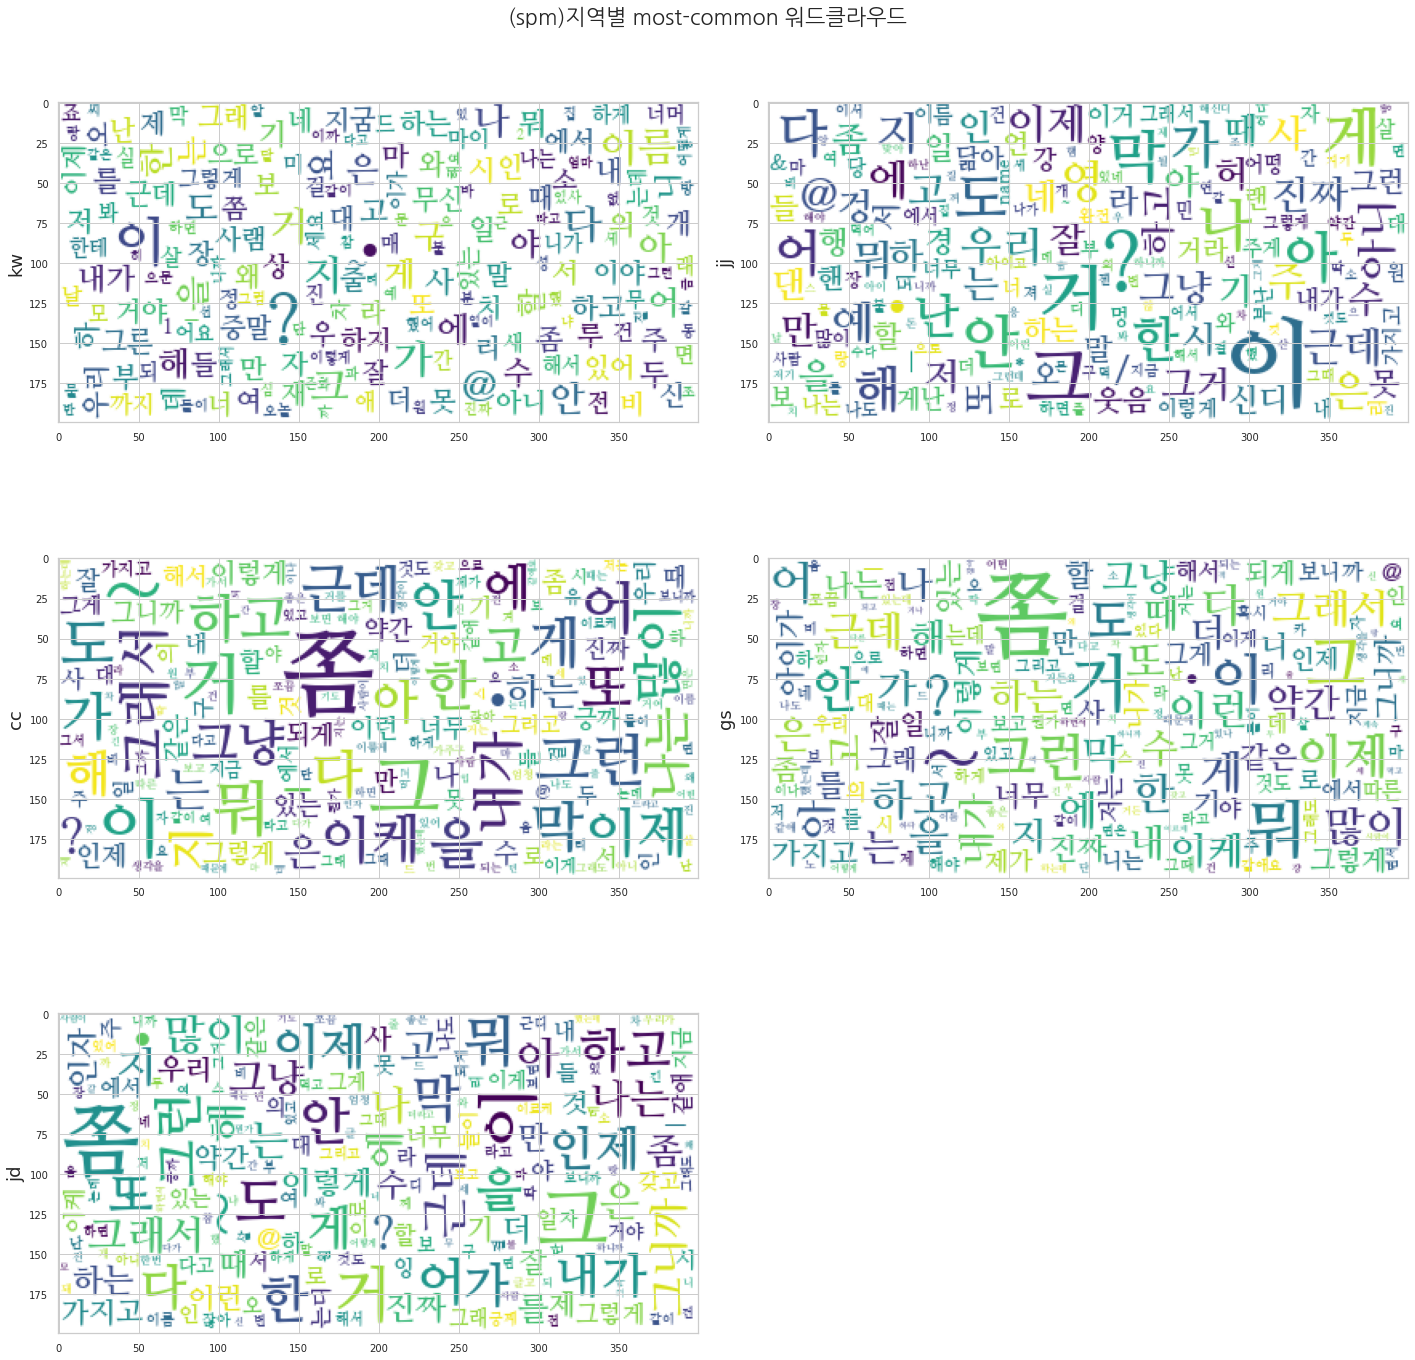

In [100]:
plt.figure(figsize= (20,20))

for i, reg in enumerate(regs) :
    counter = Counter()
    for k in df.loc[df['reg'] == reg].spm_token_dial :
        counter.update(k)
    
    print(reg)
    print(counter.most_common(30),end='\n\n')

    # font path http://corazzon.github.io/matplotlib_font_setting
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1]
    wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=60)
    
    
    cloud = wc.generate_from_frequencies(counter)
    
    plt.subplot(3,2,i+1)
    plt.ylabel(reg)
    plt.imshow(cloud)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.suptitle('(spm)지역별 most-common 워드클라우드',  font ='NanumGothic')
plt.tight_layout()
plt.show()

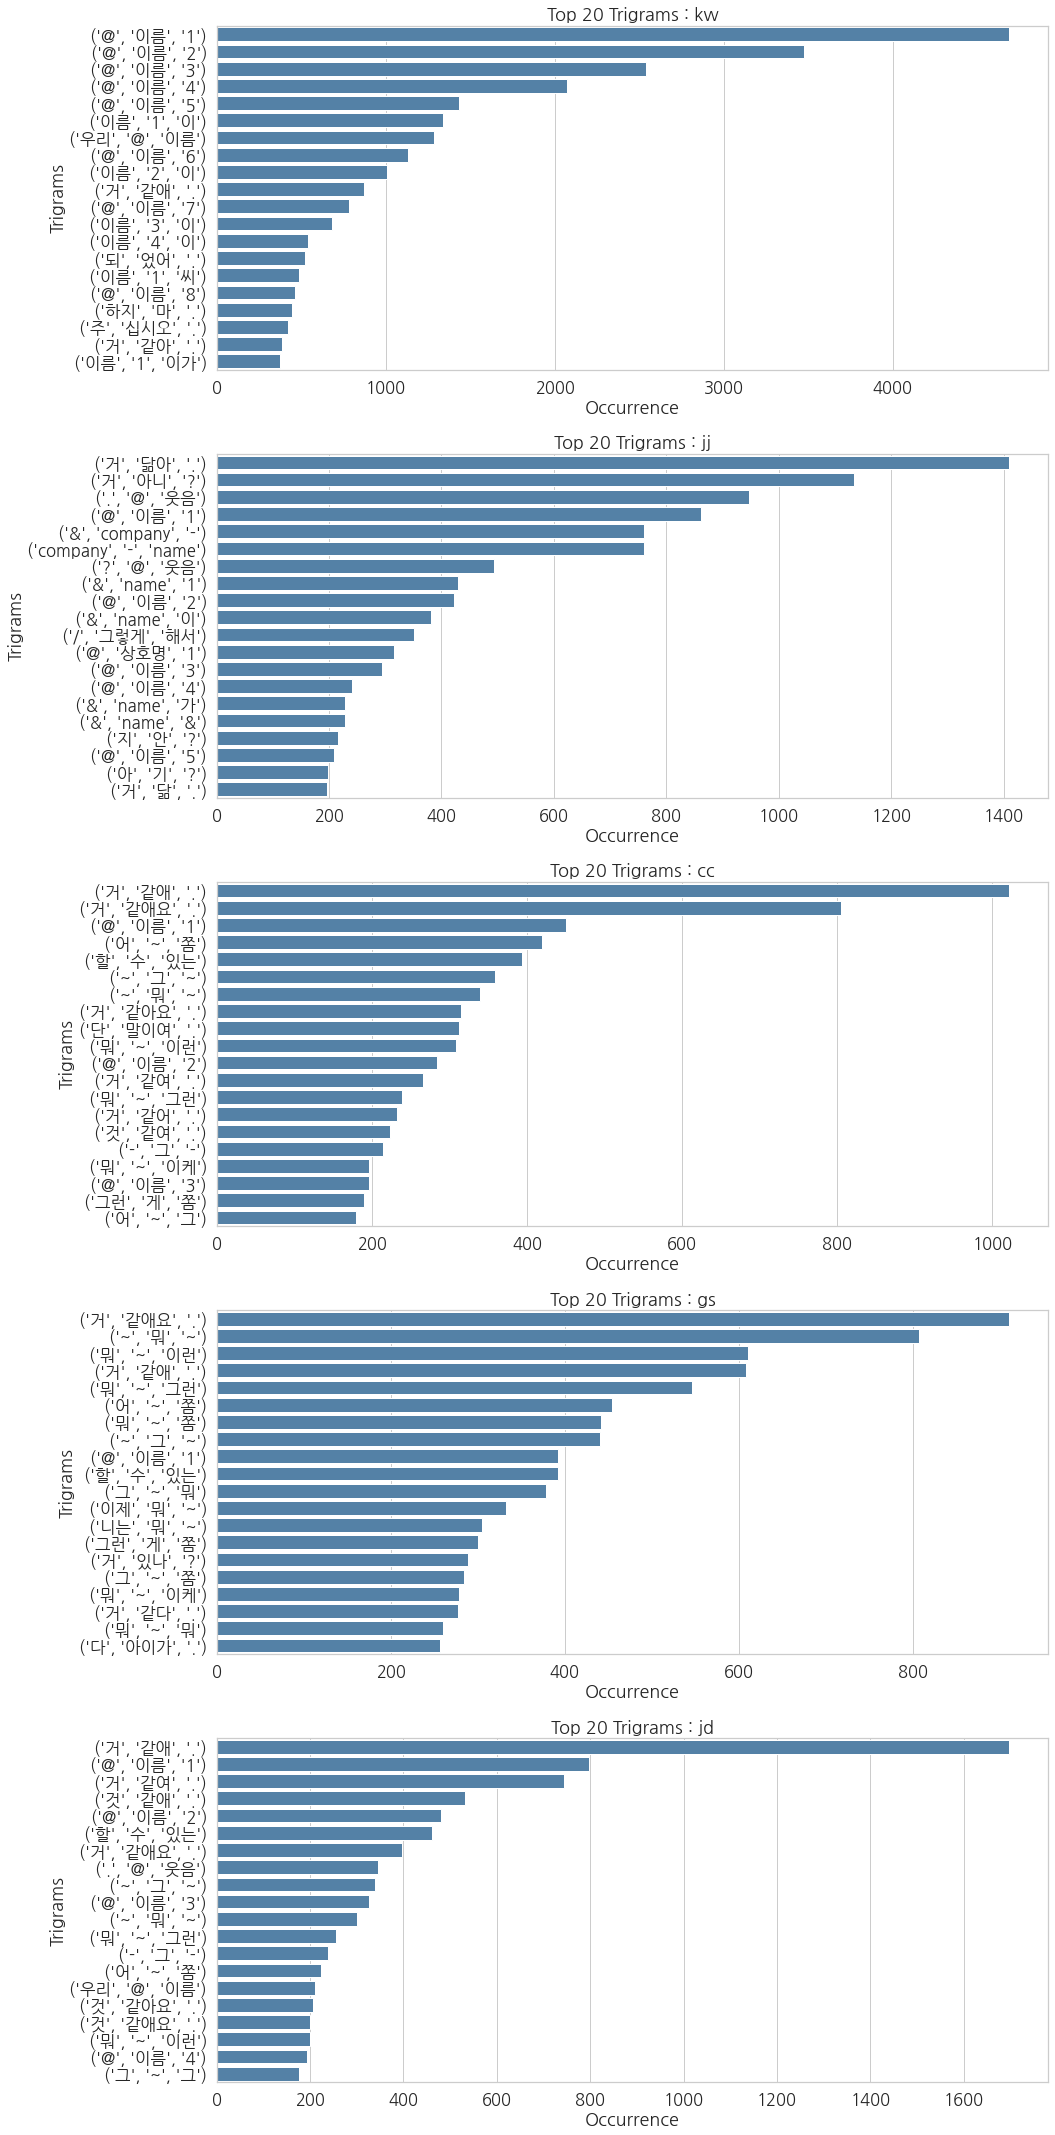

In [102]:
fig = plt.figure(figsize=(15,30))
plt.rcParams['font.family'] = 'NanumGothic'

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    
    for k in df.loc[df['reg'] == reg, 'spm_token_dial'] :
        token_words = ngrams(k,3)
        frequency_pos.update(token_words)

    df_pos = pd.DataFrame(frequency_pos.most_common(20))

    # Barplot that shows the top most common
    
    plt.subplot(5,1,i+1)
    sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')
    sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

    # Setting axes labels
    sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Trigrams', title = f'Top 20 Trigrams : {reg}')

    
plt.tight_layout()
plt.show()